In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

#### Reading the first dataset 'child_iq.csv' 

In [2]:
child_iq=pd.read_csv('child_iq.csv')
child_iq.head()

,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26


#### The first column provides no significance to the dataset, hence removing that.

In [3]:
child_iq_1=child_iq.drop('Unnamed: 0',axis=1)
child_iq_1.head()

,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26


#### Renaming the 'ppvt' column to 'Child_IQ_Score'

In [4]:
child_iq_2=child_iq_1.rename(columns={'ppvt':'Child_IQ_Score'})
child_iq_2.head()

,Child_IQ_Score,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26


In [5]:
child_iq_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Child_IQ_Score  400 non-null    int64
 1   educ_cat        400 non-null    int64
 2   momage          400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


#### There is no null values in the dataset.

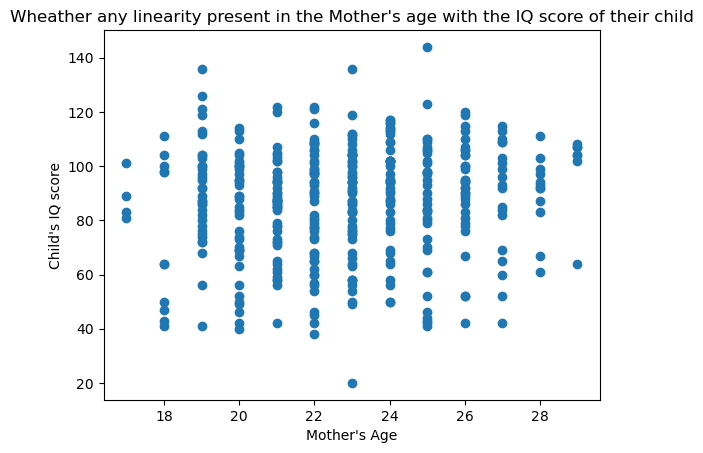

In [6]:
plt.scatter('momage','Child_IQ_Score',data=child_iq_2)
plt.xlabel("Mother's Age")
plt.ylabel("Child's IQ score")
plt.title("Wheather any linearity present in the Mother's age with the IQ score of their child")
plt.show()

#### From the above plot it can be concluded that there are no positive nor negative linear relations are present between Mother's age and Children IQ Score. 

#### Basic Descriptive Statistics of the data

In [7]:
child_iq_2.describe()

,Child_IQ_Score,educ_cat,momage
count,400.000000,400.000000,400.000000
mean,86.932500,2.112500,22.790000
std,20.440094,0.813325,2.689607
min,20.000000,1.000000,17.000000
25%,74.000000,2.000000,21.000000
50%,90.000000,2.000000,23.000000
75%,102.000000,3.000000,25.000000
max,144.000000,4.000000,29.000000


In [8]:
print(child_iq_2['momage'].describe())

count    400.000000
mean      22.790000
std        2.689607
min       17.000000
25%       21.000000
50%       23.000000
75%       25.000000
max       29.000000
Name: momage, dtype: float64


In [9]:
print(child_iq_2.groupby('educ_cat')['Child_IQ_Score'].describe())

          count       mean        std   min    25%   50%    75%    max
educ_cat                                                              
1          85.0  78.447059  22.715899  20.0  60.00  80.0   97.0  136.0
2         212.0  88.702830  19.055703  38.0  76.75  90.5  102.0  126.0
3          76.0  87.789474  18.388631  42.0  76.75  90.0  102.0  122.0
4          27.0  97.333333  21.136916  52.0  93.00  99.0  107.0  144.0


#### Let's create a histogram to check if there is enough evidence to conclude if Mother's IQ can be used alone to predict Child'd IQ effectively.

In [10]:
def display_iq_by_age_bins(data, age_col, iq_col, bins, bin_labels=None):
    data['age_bin'] = pd.cut(data[age_col], bins=bins, labels=bin_labels, include_lowest=True)
    grouped = data.groupby('age_bin')[iq_col].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.bar(grouped['age_bin'].astype(str), grouped[iq_col], color='skyblue', edgecolor='black')
    plt.title("Average Children's IQ by Mother's Age Group", fontsize=14)
    plt.xlabel("Mother's Age Group", fontsize=12)
    plt.ylabel("Average IQ Score", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

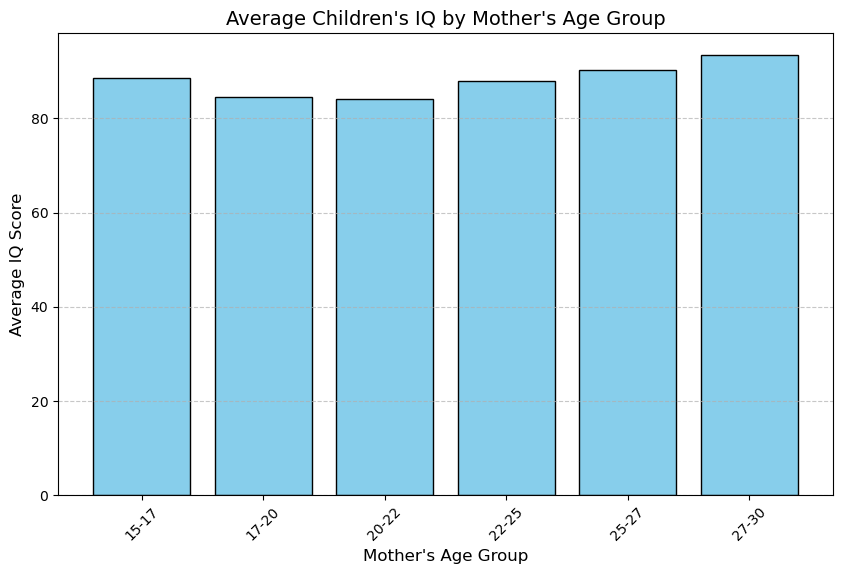

In [11]:
bins = [15, 17, 20, 22, 25, 27, 30]
bin_labels = ['15-17', '17-20', '20-22', '22-25', '25-27', '27-30']
display_iq_by_age_bins(child_iq_2, age_col='momage', iq_col='Child_IQ_Score', bins=bins, bin_labels=bin_labels)

#### The bar chart shows average IQ scores of children by their mothers' age ranges. IQ scores are fairly consistent across groups, with a slight increase from younger to older mothers (15-17 to 27-30). This weak trend suggests other factors like education, socioeconomic status, or genetics may have a stronger influence on IQ.

#### Therefore, it can be concluded that Mother's age can't be a good predictor of Child's IQ since there are no significant differences in the age groups.

#### Now let's examine Children's IQ distribution using the Mother's education level/category

#### First of all, let's plot a histogram plot and then a violin plot to determine the IQ's.

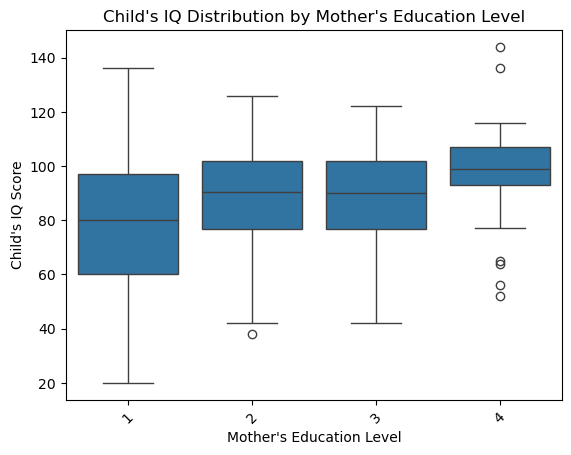

In [12]:
sns.boxplot(data=child_iq_2, x='educ_cat', y='Child_IQ_Score')
plt.title("Child's IQ Distribution by Mother's Education Level")
plt.xlabel("Mother's Education Level")
plt.ylabel("Child's IQ Score")
plt.xticks(rotation=45)
plt.show()

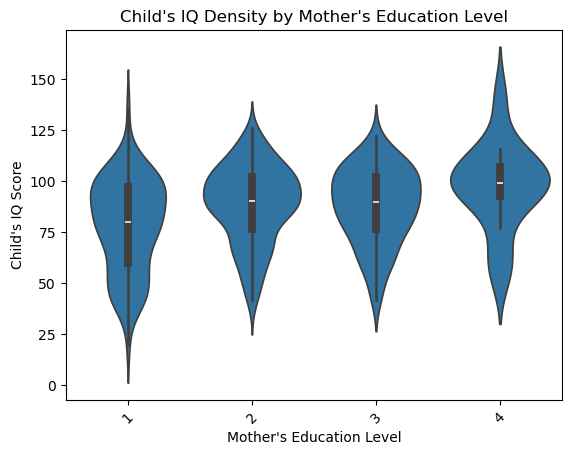

In [13]:
sns.violinplot(data=child_iq_2, x='educ_cat', y='Child_IQ_Score')
plt.title("Child's IQ Density by Mother's Education Level")
plt.xlabel("Mother's Education Level")
plt.ylabel("Child's IQ Score")
plt.xticks(rotation=45)
plt.show()

#### From both the plots it is obvious that the Mother's with the college graduation did have a Child IQ more than that of any college or HS Grad or no education. College or HS grad Mother's almost have the same IQ of their children and the IQ of children are low when their Mother's have no education.

#### We can prove the above statement plotting the average child's IQ using their mother's educational category.

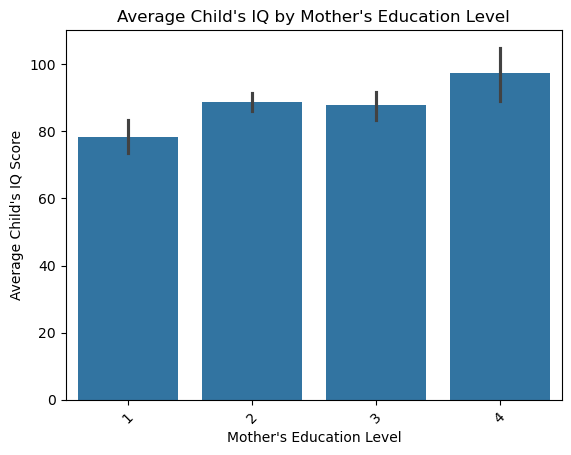

In [14]:
sns.barplot(data=child_iq_2, x='educ_cat', y='Child_IQ_Score', estimator='mean')
plt.title("Average Child's IQ by Mother's Education Level")
plt.xlabel("Mother's Education Level")
plt.ylabel("Average Child's IQ Score")
plt.xticks(rotation=45)
plt.show()

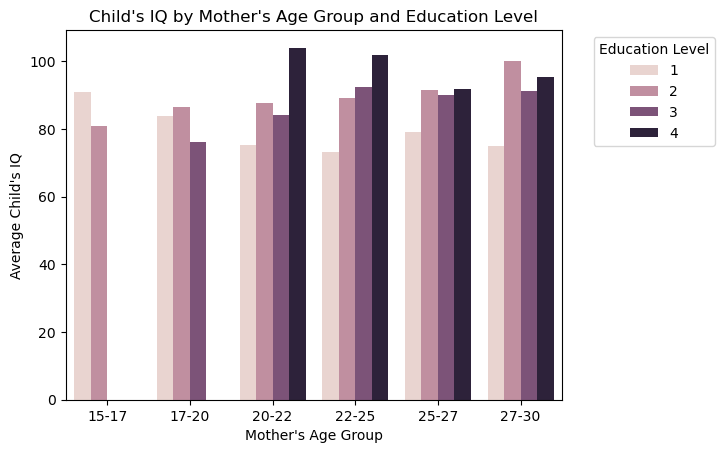

In [15]:
child_iq_2['age_bin'] = pd.cut(child_iq_2['momage'], bins=[15, 17, 20, 22, 25, 27, 30],
                               labels=['15-17', '17-20', '20-22', '22-25', '25-27', '27-30'])
sns.barplot(data=child_iq_2, x='age_bin', y='Child_IQ_Score', hue='educ_cat', ci=None)
plt.title("Child's IQ by Mother's Age Group and Education Level")
plt.xlabel("Mother's Age Group")
plt.ylabel("Average Child's IQ")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### From the above graph, irrespective of the age group (igore the ages below 20) it can be concluded that College graduation can lead to a better IQ for the child.

#### This is a bonus plot for a bonus perspective. 😉

In [16]:
from mpl_toolkits.mplot3d import Axes3D

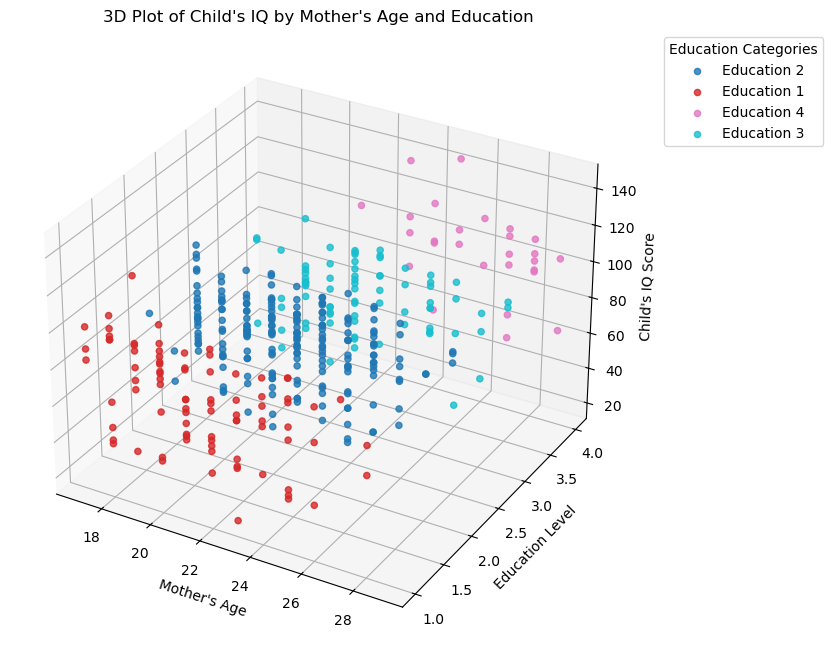

In [17]:
categories = child_iq_2['educ_cat'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))
color_map = {category: color for category, color in zip(categories, colors)}
child_iq_2['color'] = child_iq_2['educ_cat'].map(color_map)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for category in categories:
    subset = child_iq_2[child_iq_2['educ_cat'] == category]
    ax.scatter(subset['momage'], subset['educ_cat'], subset['Child_IQ_Score'],
               color=color_map[category], label=f"Education {category}", alpha=0.8)
ax.set_xlabel("Mother's Age")
ax.set_ylabel("Education Level")
ax.set_zlabel("Child's IQ Score")
plt.title("3D Plot of Child's IQ by Mother's Age and Education")
plt.legend(title="Education Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### When we look at the overall correlation, there is almost no correlation between each of the independent variables with the target variable.

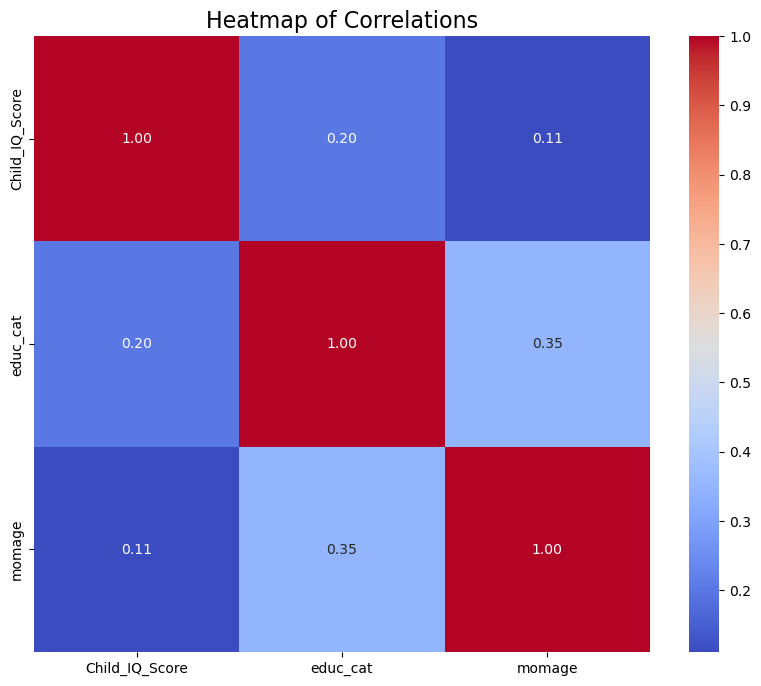

In [18]:
corr_matrix=child_iq_2[child_iq_2.columns[:3]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap of Correlations", fontsize=16)
plt.show()

#### One-hot encoding the 'educ_cat' i.e., education category of the mother's column

In [19]:
dummies = pd.get_dummies(child_iq_2.educ_cat, dtype='int')
dummies.columns = [f'col{i+1}' for i in range(dummies.shape[1])]
dummies.head()

,col1,col2,col3,col4
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1


#### Concatenating the encoded columns with the dataset

In [20]:
child_iq_3=pd.concat([child_iq_2.drop(['educ_cat','age_bin','color'],axis='columns'),
                      dummies.drop(['col4'],axis='columns')],axis='columns')
child_iq_3.head()

,Child_IQ_Score,momage,col1,col2,col3
0,120,21,0,1,0
1,89,17,1,0,0
2,78,19,0,1,0
3,42,20,1,0,0
4,115,26,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = child_iq_3.drop(['Child_IQ_Score'],axis='columns')
y = child_iq_3['Child_IQ_Score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=44)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred_lr=lr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_lr))

0.09721618305079427


#### As expected, Linear Regression performs worst on this data even after performing cross-validation. 

In [28]:
import statsmodels.api as sm
model = sm.OLS.from_formula("Child_IQ_Score ~ momage + col1 + col2 + col3", data=child_iq_3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Child_IQ_Score   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.280
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           6.59e-05
Time:                        23:00:32   Log-Likelihood:                -1761.7
No. Observations:                 400   AIC:                             3533.
Df Residuals:                     395   BIC:                             3553.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.9169     10.964      8.201      0.0

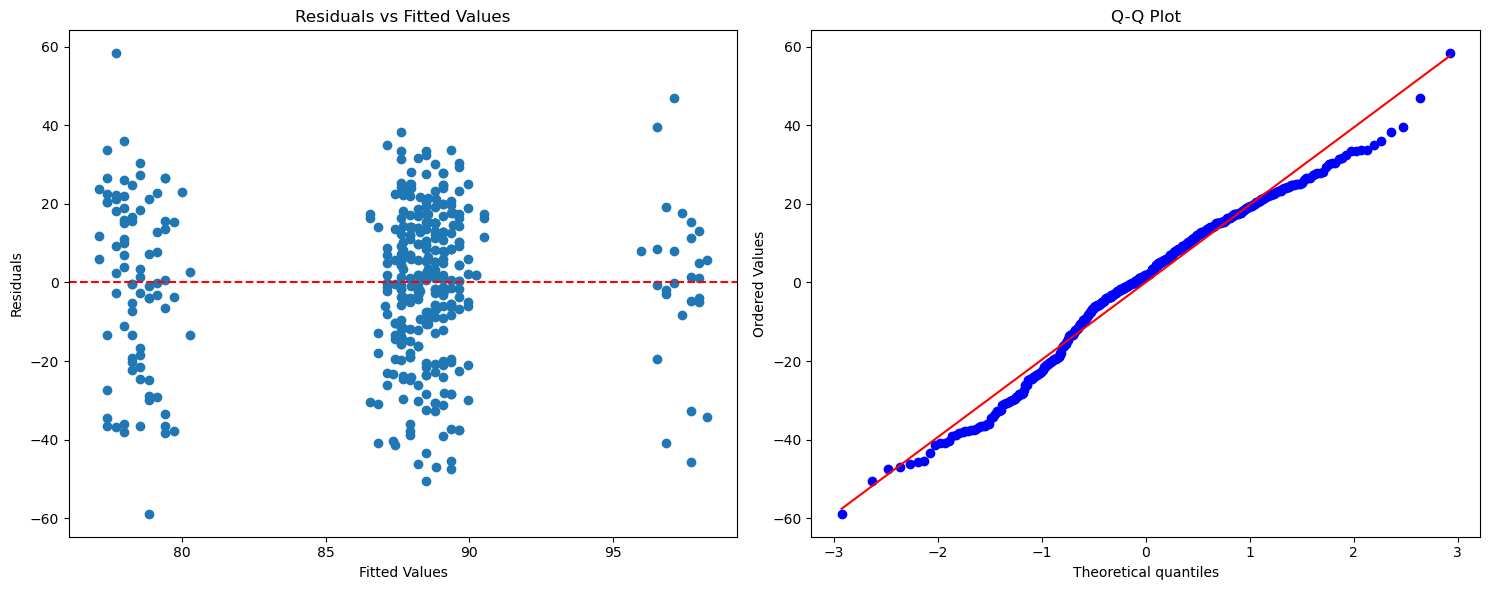

In [37]:
import scipy.stats as stats
model = sm.OLS.from_formula("Child_IQ_Score ~ momage + col1 + col2 + col3", data=child_iq_3).fit()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(model.fittedvalues, model.resid)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted Values")
stats.probplot(model.resid, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

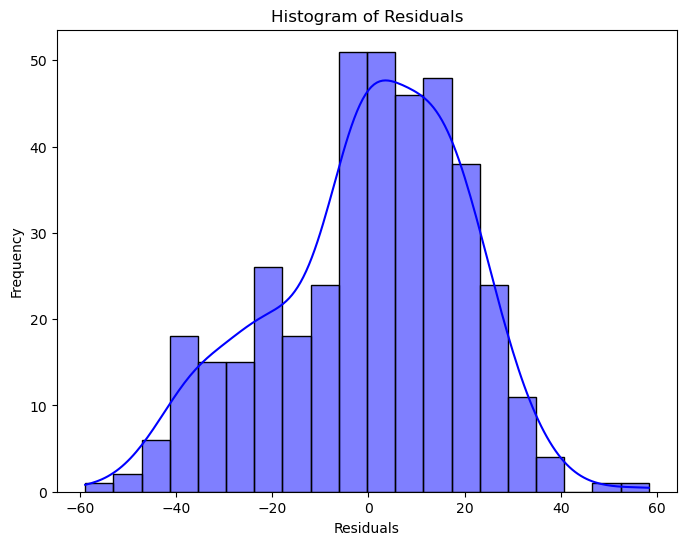

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True, bins=20, color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### The model explains only 6% of the variance in 'Child_IQ_Score' (low R-squared) and is overall statistically significant. Mother's age has a small, non-significant positive effect, while one education category ('1') significantly reduces IQ scores by 17.68 points. Residuals are not normally distributed, indicating potential model limitations. Adding more predictors or exploring non-linear relationships may improve the model.

#### - Although The residuals represent almost normally distributed and seems homoscedastic
#### - It cannot be assumed to be good fit because of the linearity factor and thus the dip in the $R^{2}$.

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'solver': ['auto', 'svd', 'cholesky']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['squared_error', 'absolute_error']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },
        'svr': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf'],
                'C': [1, 10],
                'gamma': ['scale', 'auto']
            }
        },
        'kernel_ridge': {
            'model': KernelRidge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly']
            }
        },
        'mlp': {
            'model': MLPRegressor(max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['relu', 'tanh'],
                'solver': ['adam', 'sgd']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [38]:
result

,model,best_score,best_params
0,lasso,-0.012223,"{'alpha': 1, 'selection': 'cyclic'}"
1,ridge,-0.025576,"{'alpha': 10, 'solver': 'auto'}"
2,decision_tree,-0.224828,"{'criterion': 'squared_error', 'splitter': 'be..."
3,random_forest,-0.179250,"{'criterion': 'squared_error', 'n_estimators':..."
4,gradient_boosting,-0.009230,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
5,svr,-0.025144,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}"
6,kernel_ridge,-0.028349,"{'alpha': 0.1, 'kernel': 'poly'}"
7,mlp,-0.008491,"{'activation': 'tanh', 'hidden_layer_sizes': (..."


#### Don't know why I keep trying 😭